<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_lectures/blob/main/HW_2_1_Linear_regression_on_multiple_variables_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/cars.csv')
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
print('Іформація про всі колонки:')
df.info()

Іформація про всі колонки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
def df_report(df):
  report = {'numerical columns': df.columns[df.dtypes == "int"].to_list(),
            'numerical column count': sum(df.dtypes == "int"),
            'categorical columns': df.columns[df.dtypes == "object"].to_list(),
            'categorical columns count': sum(df.dtypes == "object"),
            'categorical binar columns': [],
            'categoracal multicategor columns': [],
            #'categorical order columns':[]
            }

  df_columns_report = {'column name': [],
                      'column type': [],
                      'number of unique values': [],
                      'values or range of values (min, max)':[]
                      }

  for column in df.columns:
    df_columns_report['column name'].append(column)
    df_columns_report['column type'].append(df[column].dtypes)
    df_columns_report['number of unique values'].append(df[column].nunique())
    if df[column].dtypes == 'object':
      column_values = df[column].unique()
      df_columns_report['values or range of values (min, max)'].append(column_values)
      if len(column_values) == 2:
        report['categorical binar columns'].append(column)
      else:
        report['categoracal multicategor columns'].append(column)
    else:
      df_columns_report['values or range of values (min, max)'].append((df[column].min(), df[column].max()))

  from tabulate import tabulate

  print(tabulate(report.items(), headers=['Сriterion name', 'Value'], tablefmt='grid'), end = '\n\n')


  df_report_result = pd.DataFrame(df_columns_report)
  return df_report_result

In [5]:
df_report(df)

+----------------------------------+-----------------------------------------------------------------------------------------+
| Сriterion name                   | Value                                                                                   |
+==================================+=========================================================================================+
| numerical columns                | ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'] |
+----------------------------------+-----------------------------------------------------------------------------------------+
| numerical column count           | 8                                                                                       |
+----------------------------------+-----------------------------------------------------------------------------------------+
| categorical columns              | ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']             

,column name,column type,number of unique values,"values or range of values (min, max)"
0,Car_ID,int64,100,"(1, 100)"
1,Brand,object,11,"[Toyota, Honda, Ford, Maruti, Hyundai, Tata, M..."
2,Model,object,58,"[Corolla, Civic, Mustang, Swift, Sonata, Nexon..."
3,Year,int64,6,"(2016, 2021)"
4,Kilometers_Driven,int64,18,"(10000, 60000)"
5,Fuel_Type,object,2,"[Petrol, Diesel]"
6,Transmission,object,2,"[Manual, Automatic]"
7,Owner_Type,object,3,"[First, Second, Third]"
8,Mileage,int64,15,"(10, 25)"
9,Engine,int64,36,"(999, 4951)"


**Висновок:**
В наборі даних 8 числових та 5 категоріальних колонок, з них:
- 2 бінарні (мають лише 2 значення): Fuel_Type та Transmission
- 2 мультикатегоріальні (більше 2х значень) зі значеннями, для яких немає відношення порядку: Brand і Model
- 1 колонка, в якій можна встановити відношення порядку:  Owner_Type зі значеннями: [First, Second, Third]

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price', 'Car_ID'], axis = 1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [7]:
# Кодування Fuel_Type
most_common_fuel = X_train['Fuel_Type'].value_counts().idxmax()
X_train['Fuel_Type_code'] = (X_train['Fuel_Type'] == most_common_fuel).astype(int)
X_test['Fuel_Type_code'] = (X_test['Fuel_Type'] == most_common_fuel).astype(int)

# Кодування Transmission
most_common_trans = X_train['Transmission'].value_counts().idxmax()
X_train['Transmission_code'] = (X_train['Transmission'] == most_common_trans).astype(int)
X_test['Transmission_code'] = (X_test['Transmission'] == most_common_trans).astype(int)

In [8]:
# Кодування Brand
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder() # Створення екземпляру кодувальника — об'єкт enc, який буде знати, як кодувати категорії
enc.fit(X_train[['Brand']]) # "Навчання" кодувальника на колонці 'Brand' з тренувального набору. Тепер enc знає всі  категорії, в якому вони порядку, і як їх кодувати.
X_train[enc.categories_[0]] = enc.transform(X_train[['Brand']]).toarray()
X_test[enc.categories_[0]] = enc.transform(X_test[['Brand']]).toarray()

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [10]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [11]:
df.groupby('Brand').Model.nunique()

,Model
Brand,
Audi,6
BMW,6
Ford,6
Honda,4
Hyundai,6
Mahindra,3
Maruti,4
Mercedes,5
Tata,6


In [12]:
df.groupby('Brand').Model.unique()

,Model
Brand,
Audi,"[A4, Q3, A6, A3, Q7, A5]"
BMW,"[X1, 5 Series, X3, 7 Series, X5, 3 Series]"
Ford,"[Mustang, Endeavour, Figo, Aspire, Ranger, Eco..."
Honda,"[Civic, City, WR-V, BR-V]"
Hyundai,"[Sonata, Creta, Verna, Elantra, Santro, Venue]"
Mahindra,"[Scorpio, Thar, XUV300]"
Maruti,"[Swift, Ertiga, Vitara, S-Cross]"
Mercedes,"[C-Class, GLC, E-Class, GLE, GLA]"
Tata,"[Nexon, Harrier, Altroz, Safari, Tigor, Tiago]"


***Кодування колонки Model***

Колонка містить 58 унікальних значень і додавати більше 50 стовбчиків за допомогою OneHotEncoder  недоцільно. Можна використати двійкове кодування: значення від 1 до 58 записуються двійковими числами, 58 в двійковій системі 111010 має шість розрядів, для кодування такий значень достатньо шести нових колонок.

В даних модель автомобіля пов'язана з назвою бренду. І для кожного з брендів представлено максимум шість моделей. Тому можна скористатися двійковим кодуванням для кожного бренду окремо. В такому випадку максимальне значення 6 буде закодоване як 110 і потребує всього три нові стовбчики для представлення таких даних.

Існують і інші способи кодування подібних категоріальних даних та саме цей спосіб гарантує збереження початкової інформації з мінімальним перетворенням (тут би ще і бренди закодувати двійковим кодуванням, це б зменшило кількість колонок з 11 до 4) - треба буде зробити :-).

In [13]:
# ! pip install category_encoders

In [14]:
# from category_encoders import BinaryEncoder


# X_new = pd.DataFrame(
#         {"Country" : ["USA", "Italy", "Lebanon", "USA"]}
#     )

# encoder = BinaryEncoder()

# encoded_X = encoder.fit_transform(X_new)

In [15]:
#encoded_X

In [16]:
# # 1. Визначаємо макс. кількість бітів
# max_bits = int(np.ceil(np.log2(df.groupby('Brand').Model.nunique().max())))

# # 2. Створюємо порожні колонки
# bit_cols = [f'Model_bin_{i}' for i in range(max_bits)]
# for col in bit_cols:
#     df[col] = 0  # або np.nan, якщо хочеш бачити порожнє

# # 3. Кодуємо моделі для кожного бренду
# for brand in df['Brand'].unique():
#     subset_idx = df[df['Brand'] == brand].index
#     subset = df.loc[subset_idx, ['Model']].copy()

#     encoder = BinaryEncoder(cols=['Model'])
#     encoded = encoder.fit_transform(subset)

#     # Перейменування колонок
#     encoded_cols = list(encoded.columns)
#     n_current_bits = len(encoded_cols)

#     # Додаємо нулі зліва, якщо потрібно
#     if n_current_bits < max_bits:
#         missing_cols = [f'Model_bin_pad_{i}' for i in range(max_bits - n_current_bits)]
#         for col in reversed(missing_cols):  # додавання перед існуючими
#             encoded.insert(0, col, 0)

#     # Перейменовуємо всі колонки на Model_bin_*
#     encoded.columns = bit_cols

#     # Вставляємо до основного датафрейму
#     df.loc[subset_idx, bit_cols] = encoded.values

# pd.set_option('display.max_columns', 100)
# display(df.head())

In [17]:
# pd.set_option('display.max_columns', 100)
# display(df[df.Brand == 'Maruti'].head(10))

In [18]:
# from category_encoders import BinaryEncoder
# import numpy as np

# # 1. Знаходимо максимальну кількість бітів
# max_bits = int(np.ceil(np.log2(X_train.groupby('Brand').Model.nunique().max())))
# bit_cols = [f'Model_bin_{i}' for i in range(max_bits)]

# # 2. Ініціалізуємо колонки
# for col in bit_cols:
#     X_train[col] = 0
#     X_test[col] = 0

# # 3. Кодування моделей — окремо для кожного бренду на train, потім застосування на test
# for brand in X_train['Brand'].unique():
#     # --- TRAIN ---
#     train_idx = X_train[X_train['Brand'] == brand].index
#     train_subset = X_train.loc[train_idx, ['Model']].copy()

#     encoder = BinaryEncoder(cols=['Model'])
#     encoded_train = encoder.fit_transform(train_subset)

#     # Додаємо біти зліва
#     n_current_bits = encoded_train.shape[1]
#     if n_current_bits < max_bits:
#         for _ in range(max_bits - n_current_bits):
#             encoded_train.insert(0, 'pad', 0)

#     encoded_train.columns = bit_cols
#     X_train.loc[train_idx, bit_cols] = encoded_train.values

#     # --- TEST ---
#     test_idx = X_test[X_test['Brand'] == brand].index
#     if not test_idx.empty:
#         test_subset = X_test.loc[test_idx, ['Model']].copy()
#         encoded_test = encoder.transform(test_subset)

#         # Додаємо біти зліва
#         n_current_bits = encoded_test.shape[1]
#         if n_current_bits < max_bits:
#             for _ in range(max_bits - n_current_bits):
#                 encoded_test.insert(0, 'pad', 0)

#         encoded_test.columns = bit_cols
#         X_test.loc[test_idx, bit_cols] = encoded_test.values

In [19]:
# pd.set_option('display.max_columns', 100)
# display(X_train[['Brand',	'Model', 'Model_bin_0',	'Model_bin_1',	'Model_bin_2']].head(20))

In [27]:
# Створення словника з двійковими кодами для моделей різних брендів
model_encoding_dict = {}
max_bits = int(np.ceil(np.log2(df.groupby('Brand').Model.nunique().max())))
bit_cols = [f'Model_bin_{i}' for i in range(max_bits)]

for brand in df['Brand'].unique():
    models = sorted(df[df['Brand'] == brand]['Model'].unique())
    model_codes = {}

    for i, model in enumerate(models, start = 1):
        binary = list(map(int, list(np.binary_repr(i, width=max_bits))))
        model_codes[model] = binary

    model_encoding_dict[brand] = model_codes

In [30]:
df_coder = pd.DataFrame(model_encoding_dict)
df_coder.shape # Перевірка чи всі моделі закодовано

(58, 11)

In [34]:
df_coder.head(20)

,Toyota,Honda,Ford,Maruti,Hyundai,Tata,Mahindra,Volkswagen,Audi,BMW,Mercedes
Camry,"[0, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Corolla,"[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fortuner,"[0, 1, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Innova,"[1, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Innova Crysta,"[1, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yaris,"[1, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR-V,NaN,"[0, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,NaN,"[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Civic,NaN,"[0, 1, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WR-V,NaN,"[1, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
def encode_model(row):
  """
  Функція для кодування
  """
  brand = row['Brand']
  model = row['Model']
  if brand in model_encoding_dict:
      codebook = model_encoding_dict[brand]
      if model in codebook:
          return codebook[model]
  # Якщо бренд або модель невідомі — повертаємо [0, 0, ..., 0]
  return [0] * max_bits # Це більше перевірка на помилку в коді

In [36]:
for col in bit_cols:
    X_train[col] = 0
    X_test[col] = 0

X_train[bit_cols] = X_train.apply(encode_model, axis=1, result_type='expand')
X_test[bit_cols] = X_test.apply(encode_model, axis=1, result_type='expand')

In [39]:
pd.set_option('display.max_columns', 100)
#display(X_test.head(20))
display(X_test[['Brand',	'Model', 'Model_bin_0',	'Model_bin_1',	'Model_bin_2']].head(20))

,Brand,Model,Model_bin_0,Model_bin_1,Model_bin_2
17,Audi,Q3,1,0,1
41,Hyundai,Santro,0,1,1
92,Volkswagen,Vento,1,1,0
14,Maruti,Ertiga,0,0,1
68,Ford,Aspire,0,0,1
31,Hyundai,Elantra,0,1,0
89,Hyundai,Venue,1,0,1
15,Honda,City,0,1,0
21,Ford,Figo,1,0,0
60,Hyundai,Verna,1,1,0


**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [38]:
df_train = pd.concat([X_train.select_dtypes(['int', 'float']), y_train], axis = 1)
corr_matrix = df_train.corr()
price_corr = df_train.corr().iloc[-1, :-1]
price_corr[price_corr.abs() > 0.5].sort_values()

,Price
Mileage,-0.638404
Transmission_code,0.680731
Engine,0.710561
Power,0.849137


**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [39]:
X_train = X_train.select_dtypes(['int', 'float'])
X_test = X_test.select_dtypes(['int', 'float'])

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  root_mean_squared_error
lr = LinearRegression().fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)
print(f'rmse_train = {root_mean_squared_error(predictions_train, y_train)}')
print(f'rmse_test = {root_mean_squared_error(predictions_test, y_test)}')

rmse_train = 210342.8016204638
rmse_test = 259601.2654272335


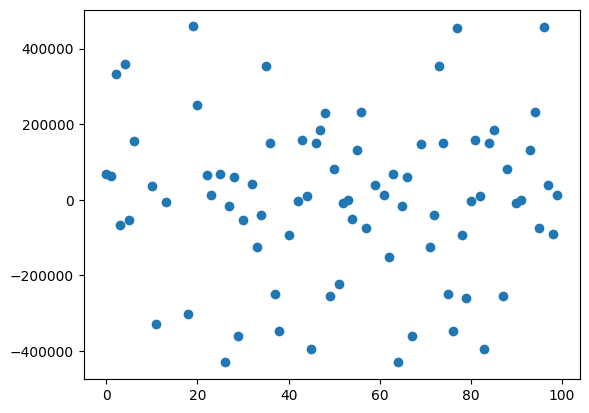

In [50]:
errors_train = predictions_train -  y_train
plt.plot(errors_train, 'o');

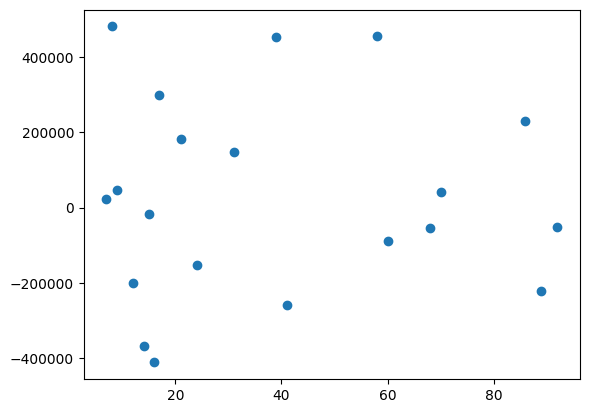

In [51]:
errors_test = predictions_test -  y_test
plt.plot(errors_test, 'o');

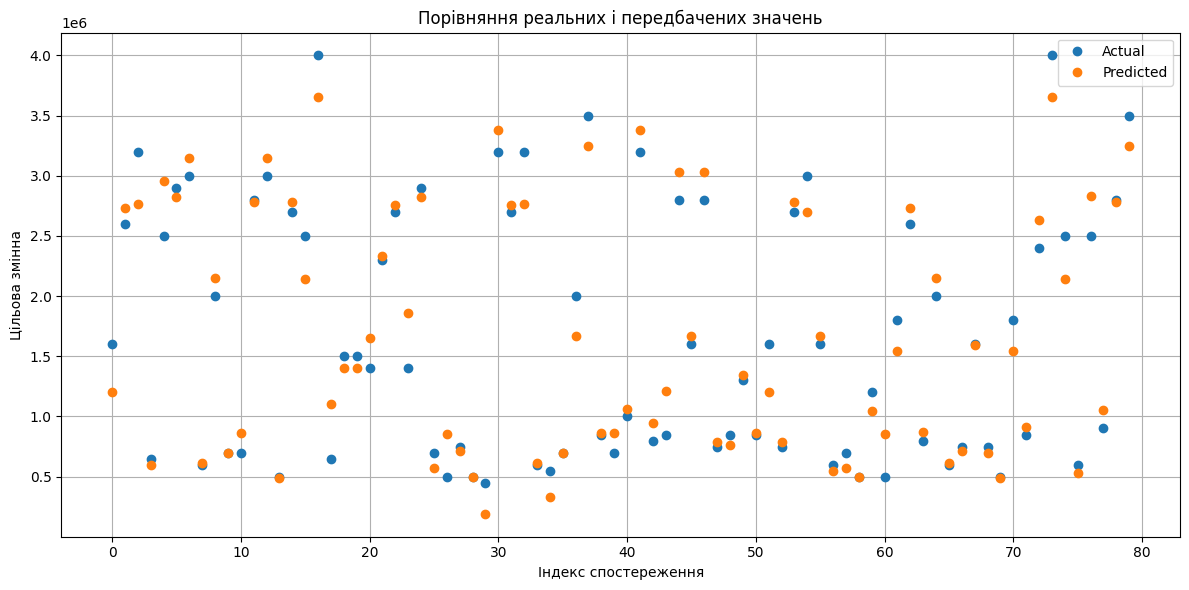

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_train.values, label='Actual', marker='o', linestyle='None')
plt.plot(predictions_train, label='Predicted', marker='o', linestyle='None')
plt.title('Порівняння реальних і передбачених значень навчальна вибірка')
plt.xlabel('Індекс спостереження')
plt.ylabel('Цільова змінна')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

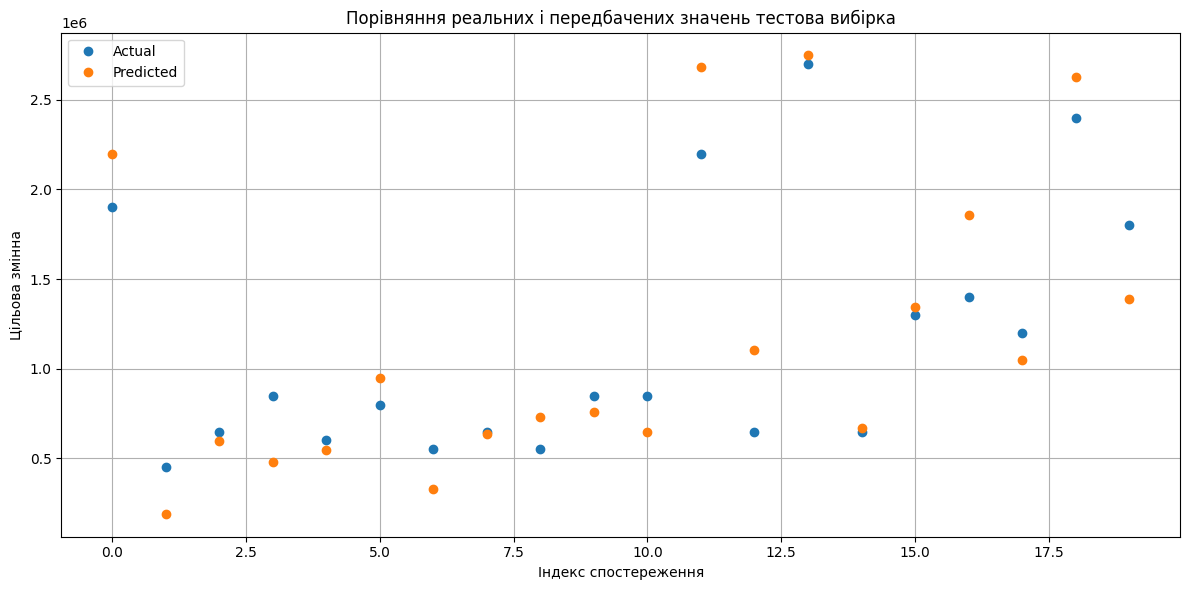

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o', linestyle='None')
plt.plot(predictions_test, label='Predicted', marker='o', linestyle='None')
plt.title('Порівняння реальних і передбачених значень тестова вибірка')
plt.xlabel('Індекс спостереження')
plt.ylabel('Цільова змінна')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?